# Clustering

In [85]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [86]:
data = pd.read_csv('insurance.csv')


a) Clustering

[[-0.84184665 -0.30151298 -0.5270176  -0.58239982]
 [ 0.82958699  0.33701896 -0.4556558   0.64352532]
 [ 0.05843855 -0.03226567  1.33658208 -0.05238068]]
[498 480 360]
{0: 443, 1: 323, 2: 298}
{0: 55, 1: 157, 2: 62}


C:\Users\Sa\AppData\Local\Temp\ipykernel_9680\2550258531.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = labels


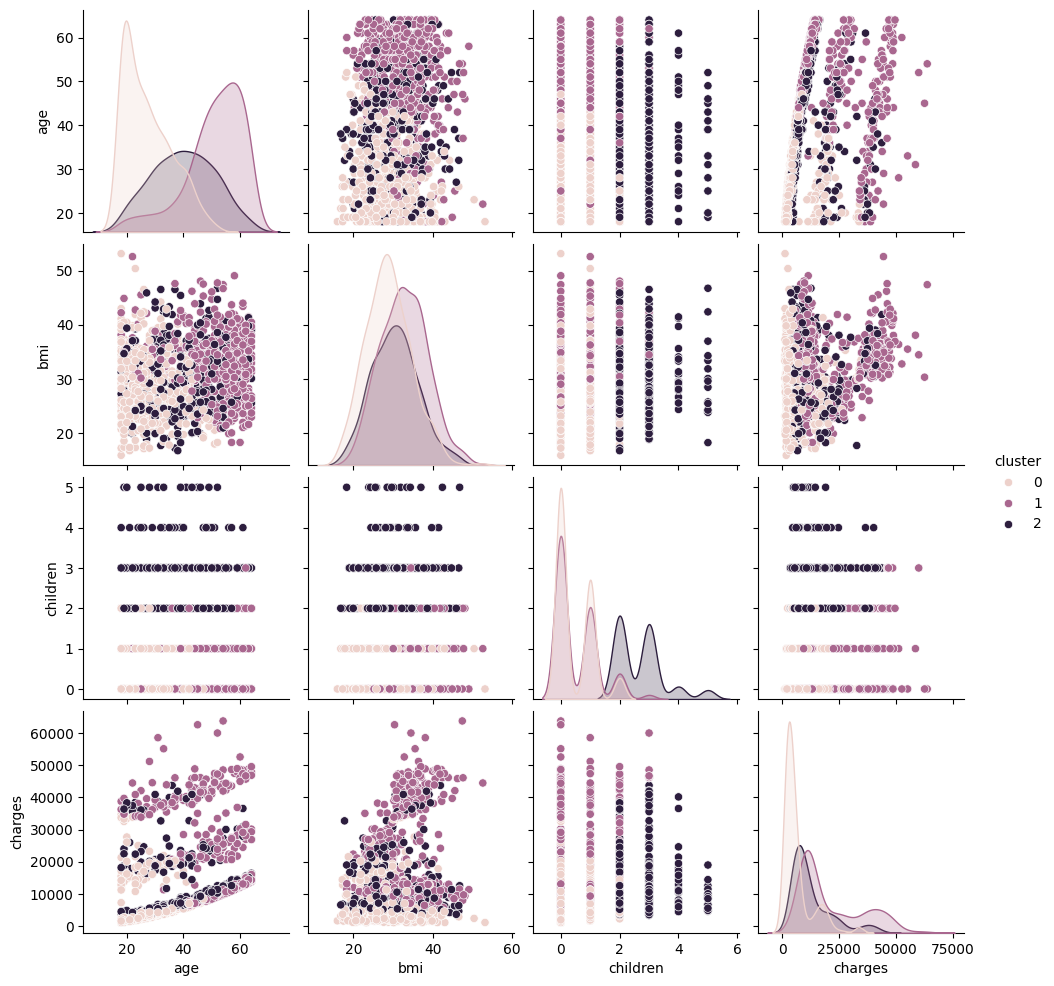

In [ ]:
features = data[['age', 'bmi', 'children', 'charges']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
model = KMeans(3,init='k-means++', random_state=42)
model.fit(scaled_data)

#centroids of all three clusters
centroids = model.cluster_centers_
print(centroids)

#size of each cluster
labels = model.labels_
cluster_sizes = np.bincount(labels)
print(cluster_sizes)


#number of smokers and non-smokers in each cluster
number_smokers = {0 : 0, 1 : 0, 2 : 0 }
number_non_smokers = {0 : 0, 1 : 0, 2 : 0 }

for i in range(len(labels)):
    if data.iloc[i]['smoker'] == 'no':
        number_non_smokers[labels[i]] += 1
    if data.iloc[i]['smoker'] == 'yes':
        number_smokers[labels[i]] += 1

print(number_non_smokers)
print(number_smokers)


#visualize 
features['cluster'] = labels
sns.pairplot(features, hue='cluster', palette='Set1')
